## Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Инструкция по выполнению проекта
Откройте файл с данными и изучите его. Путь к файлу: /datasets/users_behavior.csv.

Разделите исходные данные на обучающую, валидационную и тестовую выборки. \
Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования. \
Проверьте качество модели на тестовой выборке. \
Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше.

## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
сalls — количество звонков, \
minutes — суммарная длительность звонков в минутах, \
messages — количество sms-сообщений, \
mb_used — израсходованный интернет-трафик в Мб, \
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Импортируем нужные нам библиотеки

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

In [10]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')


Выведем первые 15 строк

In [11]:
df.head(15)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [13]:
# Пропусков нет
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [14]:
# Дубликатов нет
df.duplicated().sum()

0

In [15]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<Axes: title={'center': 'Корреляция минут и звонков'}, xlabel='calls'>

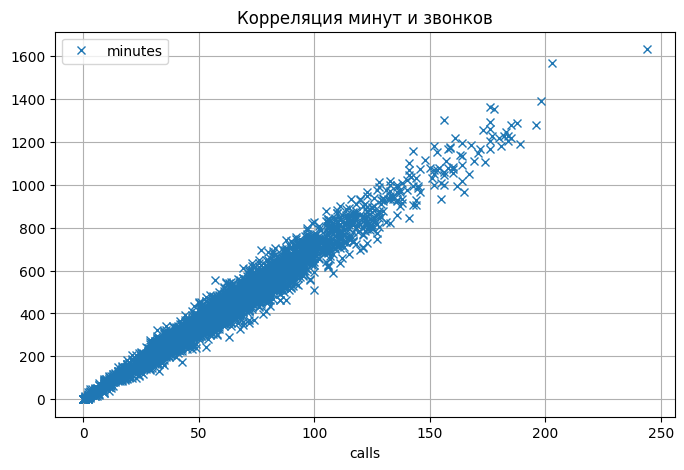

In [16]:
df.plot(x = 'calls',y = 'minutes',grid=True, style='x', figsize=(8, 5), title = 'Корреляция минут и звонков')


### Вывод: видим очень сильную взаимосвязь между минутам и звонками

#### Данные хорошо подготовлены без пропусков и дубликатов
### Приступим к выполнению проекта
Нам нужно разбить данные на выборки \
Тестовая выборка у нас отсутствует, поэтому разобъем текущую выборку на три: тестовую, обучающую и валидационную в отношении 3:1:1 \
60% - обучающая выборка \
20% -тестовая выборка \
20% - валидационная

In [17]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [18]:
features_train, features_b, target_train, target_b = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_test, target_test - признаки и целевой признак тестовой выборки
features_valid, target_valid - признаки и целевой признак валидационной выборки


In [19]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_b, target_b, test_size=0.5, random_state=12345)

In [20]:
features_train.shape

(1928, 4)

print(df_train.shape)

In [21]:
features_test.shape

(643, 4)

In [22]:
features_valid.shape

(643, 4)

### Исследуем качество разных моделей

Исследовать будем
### ДЕРЕВО РЕШЕИЙ
### СЛУЧАЙНЫЙ ЛЕС
### ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

### DecisionTree

In [23]:
best_model = None
best_result = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева

    model.fit(features_train, target_train) # обучите модель

    predictions = model.predict(features_valid) # получите предсказания модели

    result = accuracy_score(target_valid, predictions) # посчитайте качество модели

    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('Качество модели:', best_result, 'Наилучшая глубина', best_depth)

Качество модели: 0.7993779160186625 Наилучшая глубина 7


In [32]:
best_model = None
best_result = 0

for depth in range(1, 11):
    for min_samples_leaf in range(1, 11):
        for min_samples_split in range(2, 11):
            for criterion in ['gini', 'entropy']:  # исправлено: добавлен список критериев

                model = DecisionTreeClassifier(class_weight=None,
                                               criterion=criterion,
                                               max_depth=depth,
                                               min_samples_leaf=min_samples_leaf,
                                               min_samples_split=min_samples_split,
                                               random_state=12345)

                model.fit(features_train, target_train)  # исправлено: обучение модели model_2 заменено на model

                predictions = model.predict(features_valid)

                result = accuracy_score(target_valid, predictions)

                if result > best_result:
                    best_model = model
                    best_result = result
                    best_depth = depth
                    best_params = [criterion, min_samples_leaf, min_samples_split]

print('Качество модели:', best_result, 'Наилучшая глубина:', best_depth, 'Лучшие параметры:', best_params)

Качество модели: 0.8009331259720062 Наилучшая глубина: 7 Лучшие параметры: ['gini', 3, 2]


### RandomForest

In [25]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators= est, max_depth=depth) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных

print("Качество модели:", best_result, 'Лучшая глубина', best_depth)

Качество модели: 0.8055987558320373 Лучшая глубина 1


In [26]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 11):
    for depth in range (1,11):
        model = RandomForestClassifier(random_state=12345,criterion='gini', n_estimators= est, max_depth=depth) # обучите модель с заданным количеством деревьев
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
        if result > best_result:
            best_model = model# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_est = est

print("Качество модели:", best_result, 'Лучшая глубина', best_depth, 'Количество деревьев:', best_est,'Лучшая модель:',best_model)

Качество модели: 0.8133748055987559 Лучшая глубина 1 Количество деревьев: 8 Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=8, random_state=12345)


In [27]:
#Гиперпараметры для дальнейшего использования
#criterion='gini', max_depth=None, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#max_features='auto', max_leaf_nodes=None,

### LogisticRegression

In [28]:
model = LogisticRegression(random_state=12345, solver='lbfgs')# Напишите код здесь
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = model.score(features_train, target_train)
print('Качество модели',result)

Качество модели 0.7131742738589212


### Лучшая модель:
1.RandomForest \
2.DecisionTree \
3.LogisticRegression

### Проверим качество модели на тестовой выбрке

In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators= 7, max_depth= 7)
model.fit(features_train, target_train)
result = model.score(features_test, target_test)
print('Качество модели на тестовых данных',result)

Качество модели на тестовых данных 0.7931570762052877


### Проверьте модели на вменяемость

In [30]:
strategies = ['most_frequent']

dummy_results = []

for strategy in strategies:
    dummy_classifire = DummyClassifier(strategy = strategy, random_state = 0)

dummy_classifire.fit(features_train, target_train)

result = dummy_classifire.score(features_test, target_test)

dummy_results.append({strategy: result})

pd.DataFrame(dummy_results)


,most_frequent
0,0.706065


### Вывод: На тестовых данных модель показывает лучше результат, что подтверждает адекватность нашей модели

### Итоговый вывод по проекту:
Мы рассмотрели 3 модели (расположил их в порядке убывания показателя точности модели) \
1.RandomForest \
2.DecisionTree \
3.LogisticRegression \
Также мы рассмотрели модель на адекватность и подтвердили ее.
Повели оценку модели на тестовых даных (точность оказалась чуть ниже валидационных, что является нормальным)
